# Wine Data Set
Authors:  
- Minh Duc Ngo  
- Catharina Hoppensack  

This notebook is our own work. Any other sources have been clearly marked and cited.

All authors contributed equally.

### Goal
Our goal is to predict the quality of the wine based on different chemical measurments.


Before we started, we prepared our coding environment and packages we have chosen.

# 1 Environment
We worked with the following environment for this jupyter notebook:

- Python version: (3.10.19) 3.11.9  
- OS: Windows 11  
- Environment: Visual Studio Code

### Packages

With execution of the following code cell, all libraries used in this jupyter notebook will be downloded. You may need to restart the kernel to use updated packages.

In [45]:
#install all basic libraries
%pip install seaborn matplotlib pandas numpy scikit-learn 

Note: you may need to restart the kernel to use updated packages.


The following link will take you to the official pytorch website. There you can choose the appropiate settings for your hardware and copy the created command line to install the proper pytorch version.

https://pytorch.org/get-started/locally/

After correct installation, all libraries used should be imported with the following commands.

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import torch
import torch.nn as nn

# 2 Load Data 
_Describe in detail their origin, content, structures and data types._

### Description of Data

The data is loaded from an URL-Link and saved in a variable. With the help of pandas, we can read the csv file and safe the data, which is seperated by a semicolon.

In [47]:
url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df_original = pd.read_csv(url, sep=";")
print(df_original.describe(include='all'))

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

The dataset originates from the UCI Machine Learning Repository and cointains 1599 wine samples with 11 chemical features and 1 target variable "quality".

# 3  Data Exploration
_Prepare statistical and visual data summaries._  

_How many variables/features does the data contain, how many samples? Are there missing values? Explore correlations among variables and conduct at least one unsupervised analysis. Consider variable transformations and normalizations where applicable._


We start by printing the info, which contains information like "the index dtype and columns, non-null values and memory usage" ([pandas n. d.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)). We also want to know the shape of the data frame and the number of missing values in each column.

In [48]:
(print("Statistical Summary:"))
print(df_original.info())
print(df_original.shape)
print("/nMissing Values in each column:")
print(df_original.isna().sum())

Statistical Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
(1599, 12)
/nMissing Values in each column:
fixed acidity           0
volatile acidity        0
citr

This is what we can see from the statistical summary:
- 12 features/variables    
- no missing values  
- all cells are numerical: 11 columns are floats, 1 column is an int (quality)  
- 1599 samples/rows: 0 - 1598  

Now we take a look at any duplicates in the data frame.

In [49]:
# Check for duplicates
dups = df_original.duplicated().sum()
print("Duplicates:", dups)

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

Duplicates: 240


Since there are 240 duplicates, we decided to get rid of them to avoid disproportional weighting on certain datasets.  
It must be stated, that these measures can be coincidentally if certain wine types happen to have similar values in each feature.  
It can also be, that accidentally certain wines were tested multiple times.

In [50]:
print("Before   :", df_original.shape)
df_noDuplicates = df_original.drop_duplicates()
print("After  :", df_noDuplicates.shape)

Before   : (1599, 12)
After  : (1359, 12)


As can be seen in the previous output, the duplicates have been removed and the sample count has been reduced.

To visualise the difference between the original and the version without duplicates, we created a graph comparing the two.  
We only used the feature "fixed acidity" to exemplary show the reduction of datasets.
Removing duplicates lowers counts across all bins which reflects the reduced sample size but the overall shape remains unchanged.



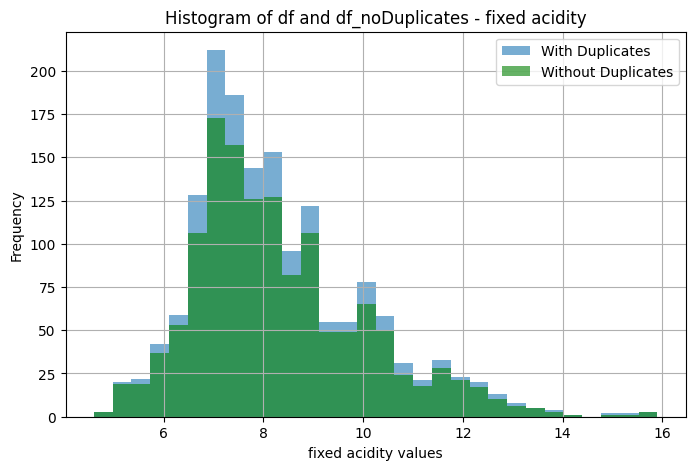

In [51]:
plt.figure(figsize=(8, 5))

# both histograms in one plot
plt.hist(df_original['fixed acidity'], bins=30, alpha=0.6, label ='With Duplicates')
plt.hist(df_noDuplicates['fixed acidity'], bins=30, alpha=0.6, color='green', label ='Without Duplicates')

# labels and title 
plt.xlabel('fixed acidity values')
plt.ylabel('Frequency')
plt.title('Histogram of df and df_noDuplicates - fixed acidity')
plt.legend()
plt.grid(True)

plt.show()

The following charts show how the values in each feature live on different scales. We can also see some skewness in some of the features, for example in "residual sugar" and "chlorides". This means we have a large range of x-values that are occupied by only very few datasets. In other words, we see an asymmetrical distribution.
  
The last subplot in the bottom right corner shows the distribution of wine quality. As we can see, the most wines are around the wine quality value of 5 and 6.
This means, the accuracy of the predicition of wine with quality values 3, 4, 7 and 8 might be weaker.

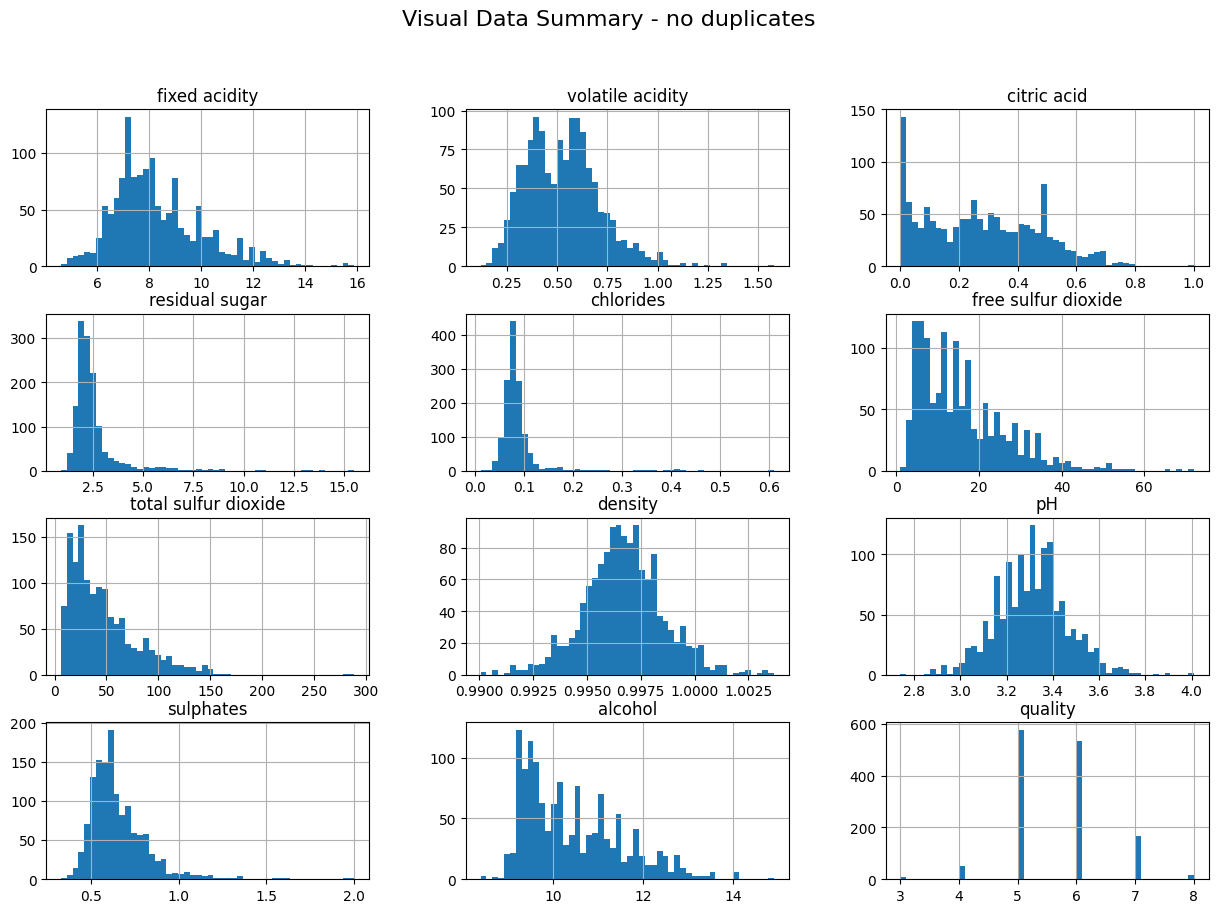

In [52]:
df_noDuplicates.hist(figsize=(15,10), bins=50) 
plt.suptitle("Visual Data Summary - no duplicates", fontsize=16)
plt.show()
#Motivation: see distributions of features individually -> clear to see skewness, outliers, normality, less chaos

#none equally distributed
#some skewed right: residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide
#some approx normal: fixed acidity, citric acid, pH, sulphates, alcohol
#some approx uniform: volatile acidity, density 

### Log Transformation for every suitable Feature 

Comparing the histograms below, we see that the x- and y- values have changed after the log-transformation. This transformation reduces skewness, which means the large value range has been compressed. This helps to reduce the influence of extreme outliers.

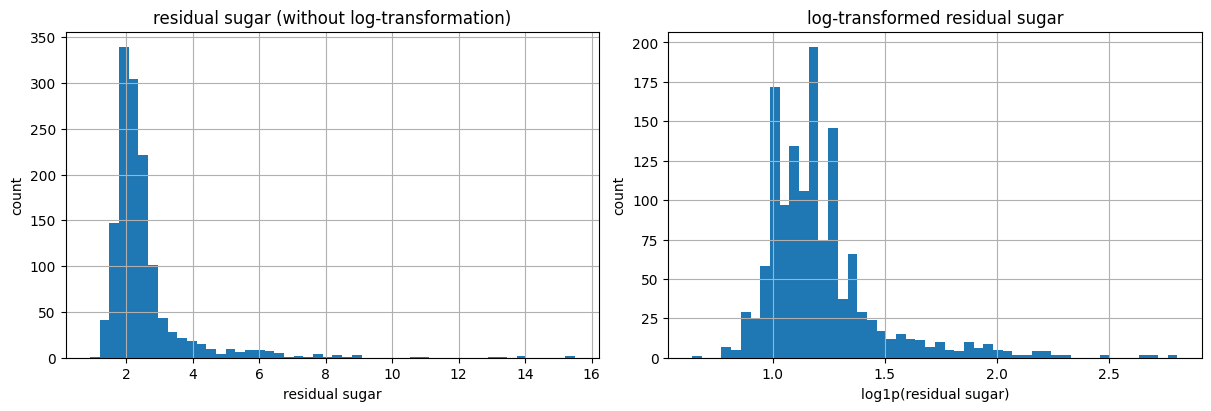

Values BEFORE log-transformation
count    1359.000000
mean        2.523400
std         1.352314
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

Values AFTER log-transformation
count    1359.000000
mean        1.216325
std         0.263457
min         0.641854
25%         1.064711
50%         1.163151
75%         1.280934
max         2.803360
Name: residual sugar, dtype: float64


In [53]:
#copy of original for visualisation
showcase_df = df_noDuplicates.copy()
#log transformation on copy
showcase_df['residual sugar'] = np.log1p(showcase_df['residual sugar'])

#subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 4), layout='constrained')

#left axes without log transformation
df_noDuplicates["residual sugar"].hist(bins=50, ax=axes[0])
axes[0].set_title("residual sugar (without log-transformation)", fontsize=12)
axes[0].set_xlabel("residual sugar")
axes[0].set_ylabel("count")

#right axes with log transformation
showcase_df["residual sugar"].hist(bins=50, ax=axes[1])
axes[1].set_title("log-transformed residual sugar", fontsize=12)
axes[1].set_xlabel("log1p(residual sugar)")
axes[1].set_ylabel("count")

plt.show()
#log transformation to reduce skewness
#makes it more evenly distributed 

print("Values BEFORE log-transformation")
print(df_noDuplicates["residual sugar"].describe())
print("\nValues AFTER log-transformation")
print(showcase_df["residual sugar"].describe())

Visually, it is quite difficult to see a huge difference, therefore we also visualised them in one graph together.

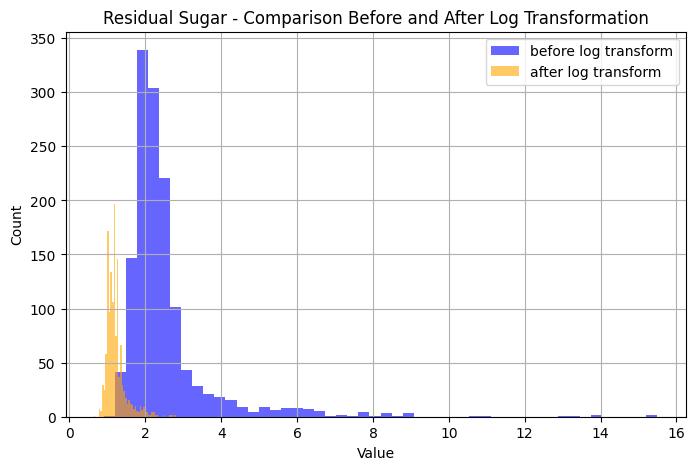

In [54]:
plt.figure(figsize=(8, 5))

# Beide Histogramme im gleichen Plot darstellen
plt.hist(df_noDuplicates['residual sugar'], bins=50, alpha=0.6, color='blue', label ='before log transform')

plt.hist(showcase_df['residual sugar'], bins=50, alpha=0.6, color='orange', label ='after log transform')


# Achsenbeschriftung und Legende
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Residual Sugar - Comparison Before and After Log Transformation')
plt.legend()
plt.grid(True)

# Anzeigen
plt.show()

In the following code blocks, we apply this log-transformation to any feature whose skewness is greater than or equal to 1.  
We chose this threshold because it indicates a high skewness while 0 would be a perfectly even distribution. 


0 < 0.5 => fairly symmetrical  
0.5 < 1 => moderately skewed  
1 or more => highly skewed  

[statisticsbypeter 2014](https://statisticsbypeter.blogspot.com/2015/04/261-skewness.html)

First, we will be checking which feature is highly skewed. Changing the threshold, the affected feautures will change. 

In [55]:
#features WITHOUT Quality
features = ["fixed acidity", "volatile acidity", "citric acid", 
            "residual sugar", "chlorides", "free sulfur dioxide",
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
            
#to determine whether transformation is necessary
log_features = []
for feat in features:
    skew = df_noDuplicates[feat].skew()
    if skew >= 1:                           #threshold can be changed here
        log_features.append(feat)

print("Relevant Features:\n")
for i in log_features:
    print(i)

Relevant Features:

residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
sulphates


Now we will apply the log transformation to any feature, that was detected before. To leave the orginial data frame unchanged, we instantiate another copy.

In [56]:
df_transformed = df_noDuplicates.copy()

for logfeat in log_features:
    # apply log1p transformation
    df_transformed[logfeat] = np.log1p(df_original[logfeat])

To make it easier for the model to learn, we will normalise the data so the mean of each feature set is centered at 0.
Keep in mind that it has changed only the location and spread, not the shape.     
In the shape of the data we can see, that the test data has fewer datasets than the train data.      
The sum of the test and train data sets corresponds to the total size (rows) of the original data frame.    
The splitting in test and train data is done to make the evaluation of the model more accurate.

X_tensor_train.shape: torch.Size([1087, 11])  y_tensor_train.shape: torch.Size([1087])
X_tensor_test.shape:  torch.Size([272, 11])   y_tensor_test.shape:  torch.Size([272])


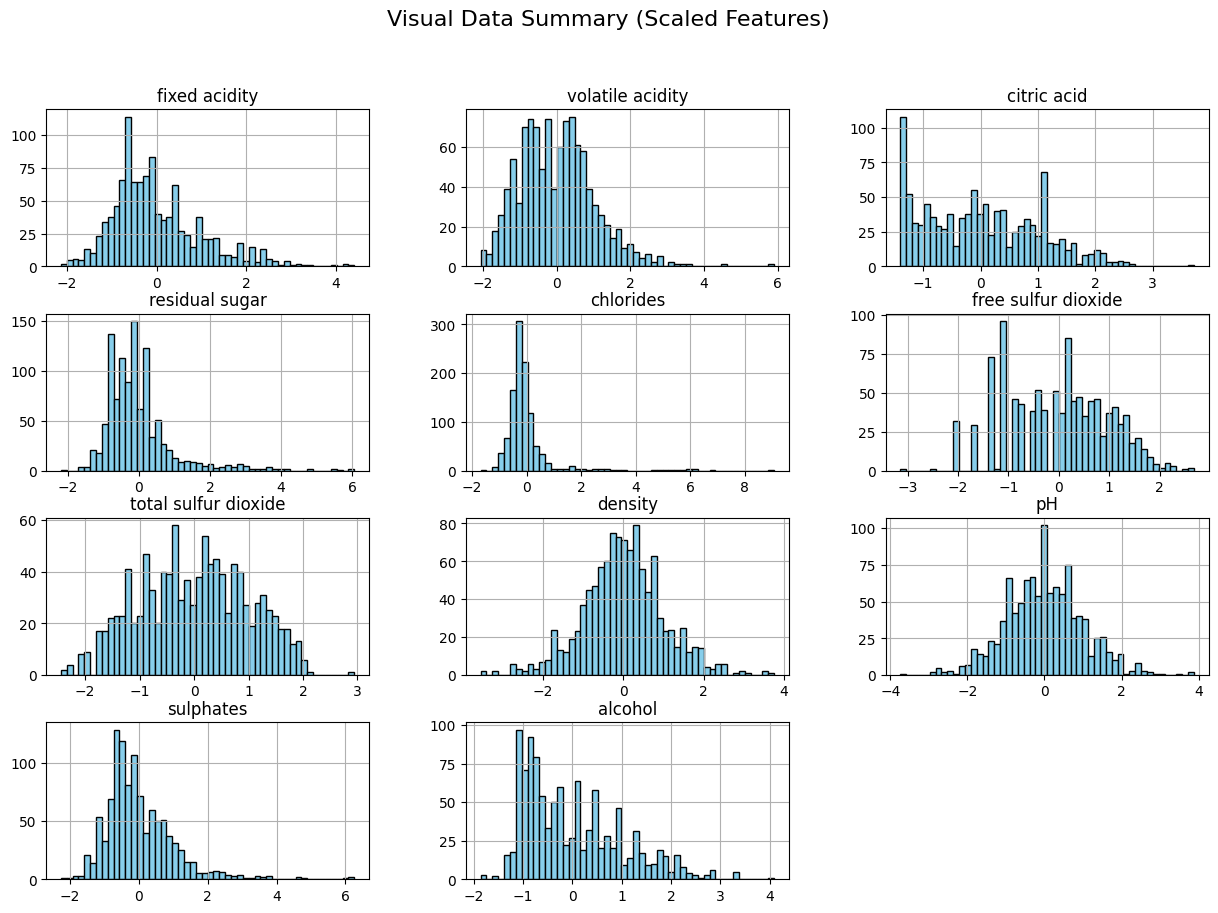

In [57]:
#normalization
y_np = df_noDuplicates['quality'].to_numpy()      #defining target variable and converting to numpy
X_np = df_transformed[features].to_numpy()       #defining data for training (all except quality)

scaler = StandardScaler() #normalization object

#splitting prevents leakage -> Avoid overfitting
#Test data is used to verify the model
X_np_train, X_np_test, y_np_train, y_np_test = train_test_split(
    X_np, y_np, test_size=0.2, random_state=42)           #random_state für Reproduzierbarkeit -> setzt Zufallssamen immer gleich

X_np_train_scaled = scaler.fit_transform(X_np_train) #learns the parameters from train data, saves them internally
X_np_test_scaled = scaler.transform(X_np_test) #uses learned parameters to transform test data

# Convert back to torch                                     
# PyTorch requires tensors as input
X_tensor_train = torch.tensor(X_np_train_scaled, dtype=torch.float32)
X_tensor_test  = torch.tensor(X_np_test_scaled, dtype=torch.float32)
y_tensor_train = torch.tensor(y_np_train, dtype=torch.float32)
y_tensor_test  = torch.tensor(y_np_test, dtype=torch.float32)

print(f'X_tensor_train.shape: {X_tensor_train.shape}  y_tensor_train.shape: {y_tensor_train.shape}')
print(f'X_tensor_test.shape:  {X_tensor_test.shape}   y_tensor_test.shape:  {y_tensor_test.shape}')

#making train data into pandas data frame for visualisation
df_scaled = pd.DataFrame(X_np_train_scaled, columns=features)

df_scaled.hist(figsize=(15,10), bins=50, color='skyblue', edgecolor='black')
plt.suptitle("Visual Data Summary (Scaled Features)", fontsize=16)
plt.show()

#https://datascientest.com/de/train-test-split
#https://www.youtube.com/watch?v=_tex9QxBX-U

### Correlation with Quality

Now we measure how each feature influences the quality.  
If the value rises proportional to the risen value of quality, then it's a positive correlation.  
If the value drops proportional to the sunken value of quality, then its a negative correlation.  
If they are irrelevant to each other, then its a neutral correlation.  

If the correlation is not neutral, the value of the chosen feature changes in proportion to the value of the correlation to quality.
  
First, we created a heatmap showing the correlation between all features.

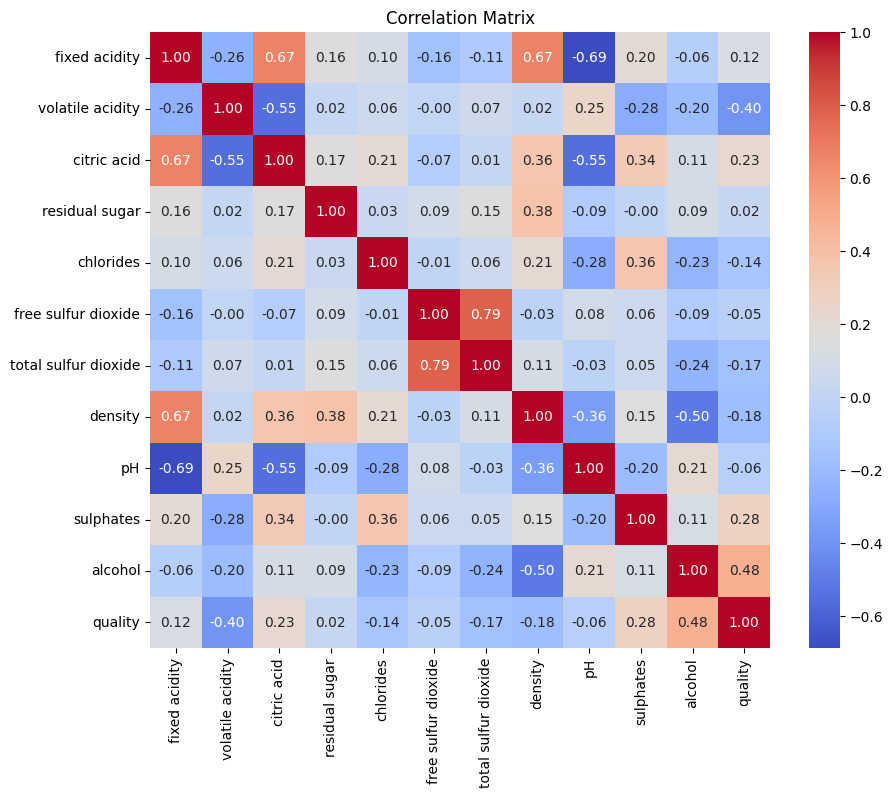

In [58]:
corr_matrix = df_transformed.corr('pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

As we only need the correlation for the quality feature, we dismissed the others and displayed it statistically and visually.

In [59]:
corr_with_quality = corr_matrix["quality"].sort_values(ascending=False)
print(corr_with_quality)

quality                 1.000000
alcohol                 0.480343
sulphates               0.279517
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.020154
free sulfur dioxide    -0.047132
pH                     -0.055245
chlorides              -0.137302
total sulfur dioxide   -0.165289
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64


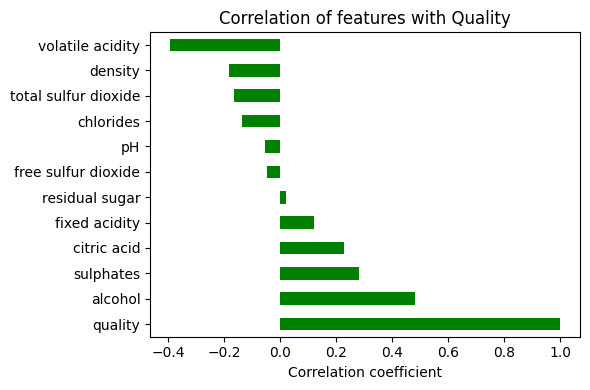

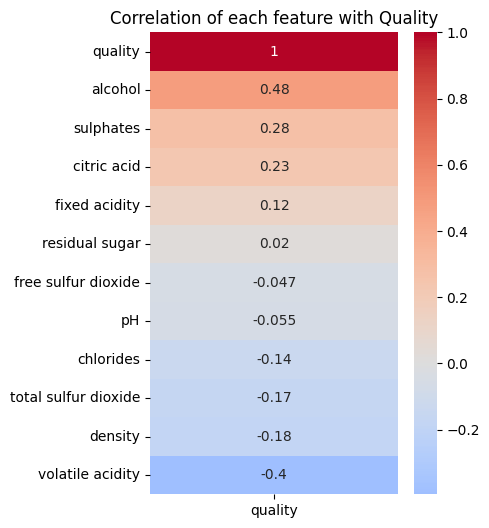

In [60]:
plt.figure(figsize=(6,4))
corr_with_quality.plot(kind='barh', color='green')
plt.title("Correlation of features with Quality")
plt.xlabel("Correlation coefficient")
plt.tight_layout()
plt.show()

corr = df_transformed.corr(numeric_only=True)[["quality"]].sort_values(by="quality", ascending=False)

plt.figure(figsize=(4,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of each feature with Quality")
plt.show()

None of the features are neutral to quality. For example, if quality rises by 1, then volatile acidity reduces by -0.4.  
  
However, the correlation values for "pH", "free sulfur dioxide" and "residual sugar" and are > -0.1 and < 0.1. This means the correlation is so low, that it can be interpreted as having no correlation.  
For "density", "total sulfur dioxide", "chlorides", "fixed acidity", "citric acid" and "sulphates" the values are > -0.3 and < 0.3. The correlation is still rather weak.  
Only "volatile acidity and "alcohol" have a moderate correlation with -0.4 and 0.48.  

### Unsupervised Clustering

Unsupervised clustering analyses data and automatically groups similar items together. It looks for patterns or structures without any prior labels or guidance.  
A K-Means clustering with 3 clusters was applied to the normalised wine data.
The goal was to group wines based on their chemical properties, such as acidity, sugar, and alcohol, without using the quality label.  
  
The data was normalised before clustering to make all variables comparable.
The pairplot visualises all variable combinations, where each point represents a wine dataset and each color represents a cluster.  
  
Some clusters show slight separation in certain features (for example, citric acid or chlorides),
while others overlap, indicating that the wines share similar chemical characteristics.
Overall, the clustering reveals some structure in the data, but the groups are not perfectly distinct.  
  
The following plots show the correlation between features with the addition of differentiating between clusters.  
We can see a lot of overlapping between the clusters, but the overall picture is not entirely clear. Also there are way too many subplots to analyse.

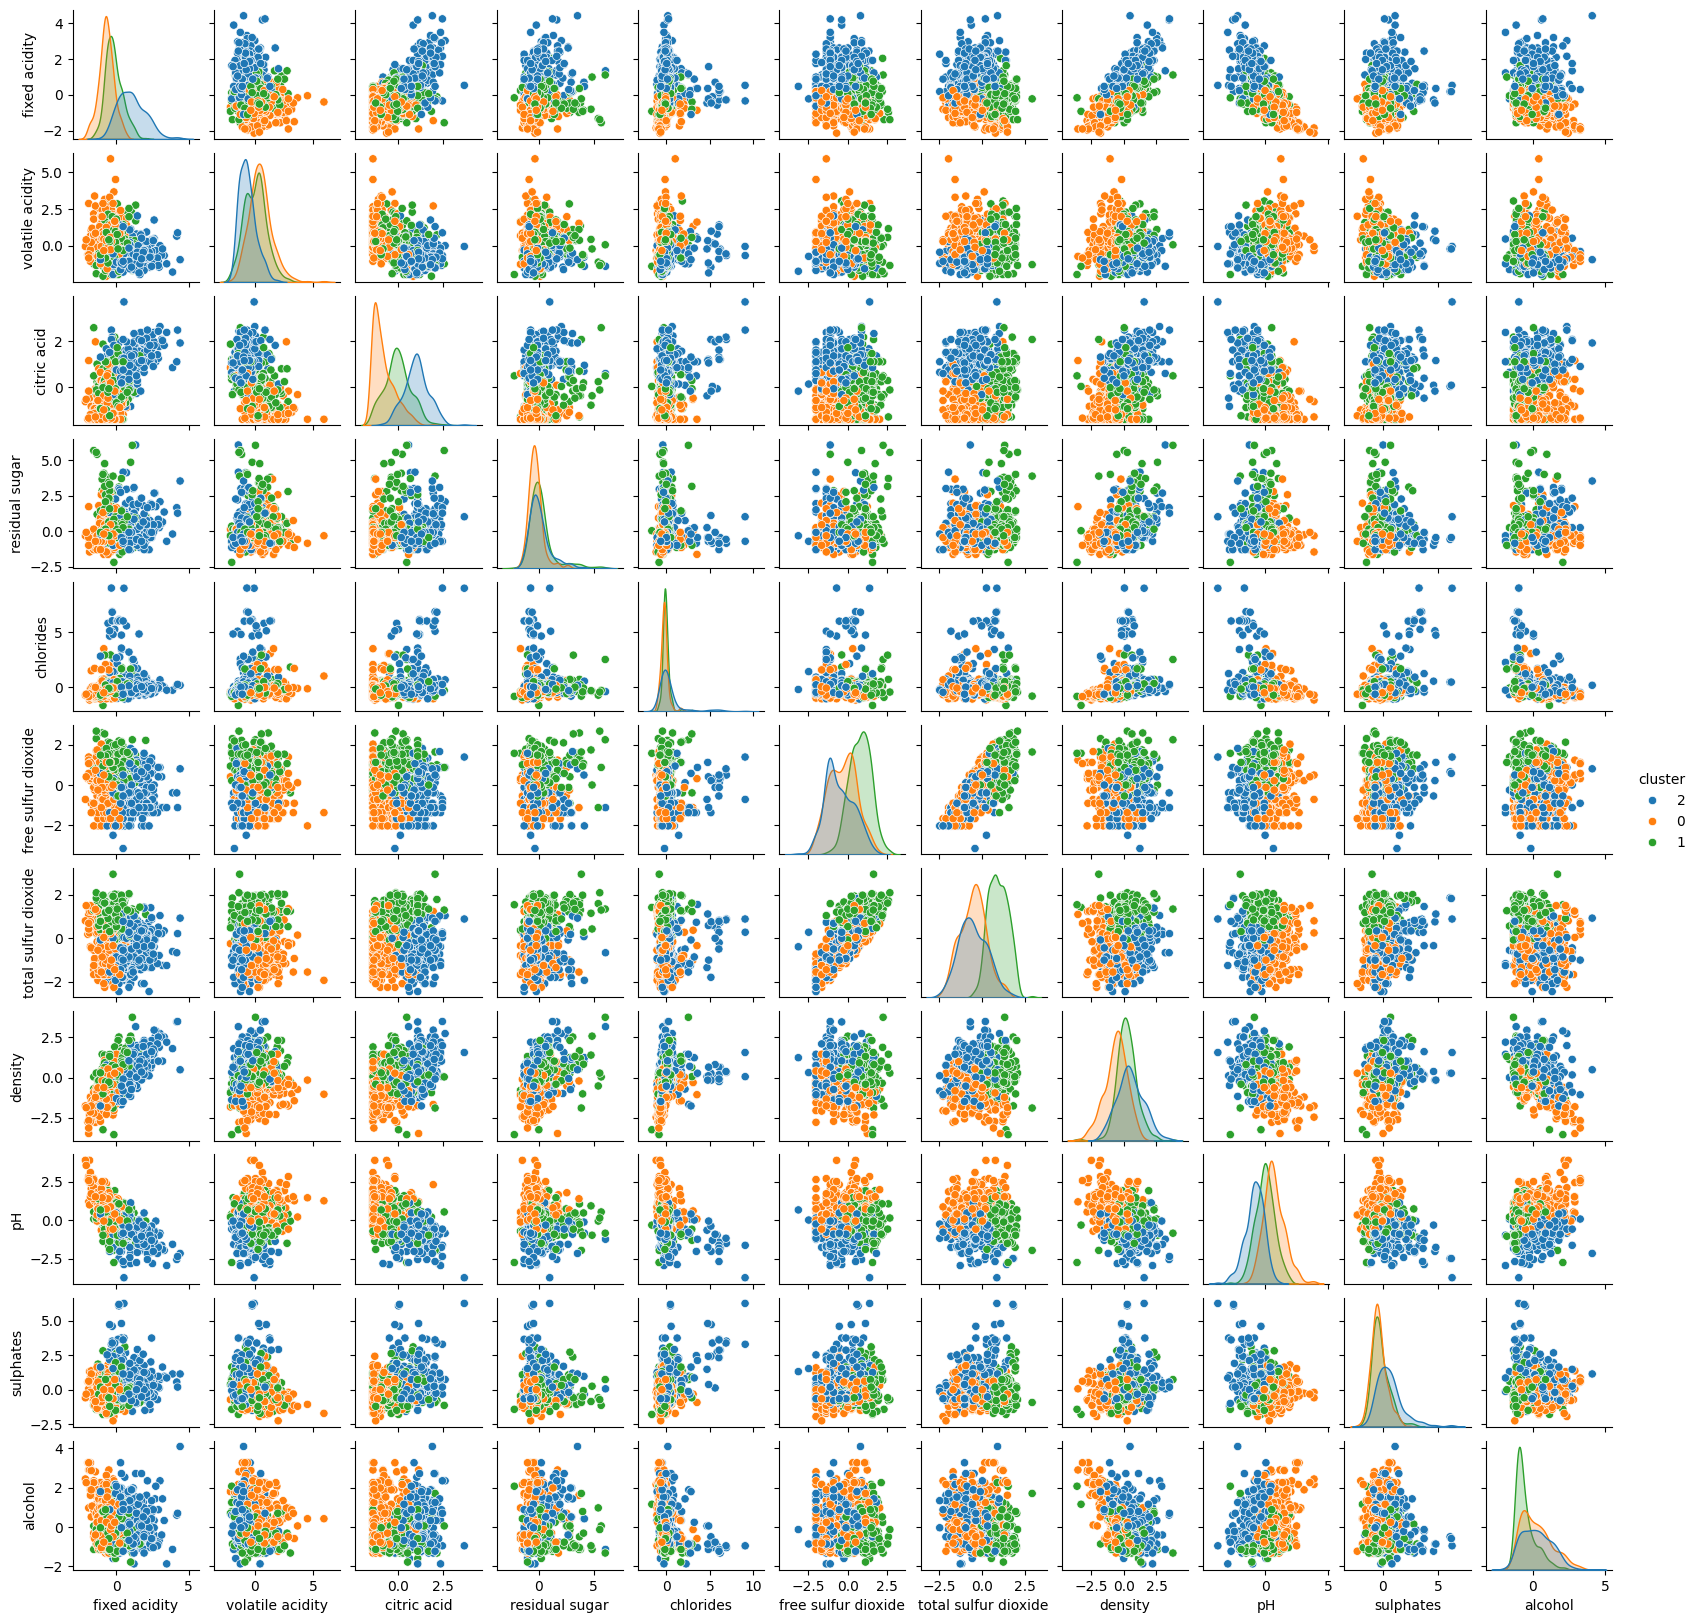

In [61]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X_np_train_scaled)
#neue Spalte "cluster"
df_scaled["cluster"] = labels.astype(str) #wandelt labels in Strings um, damit seaborn sie besser für Farben nutzen kann

sns.pairplot(df_scaled, hue="cluster", height=1.5, aspect=1.0)


To visualise the clusters better, we can compress the data frame to lesser dimensions. Here we chose 2 dimensions. This plot shows, that the prior calculated 3 clusters indeed show a distinct seperation.

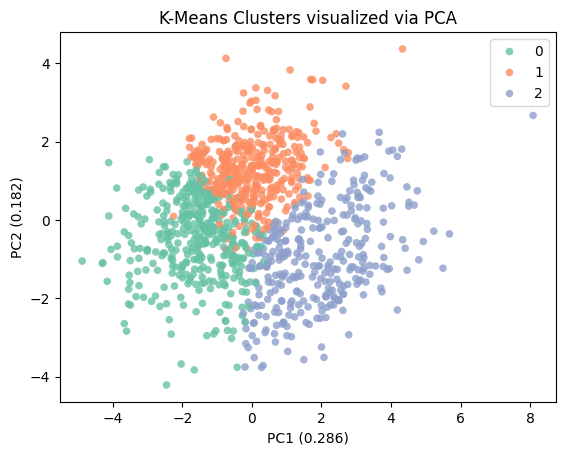

In [62]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_np_train_scaled)
var_exp = pca.explained_variance_ratio_

xlab = f"PC1 ({var_exp[0]:.3f})"
ylab = f"PC2 ({var_exp[1]:.3f})"

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
                hue=labels, palette="Set2", s=30, edgecolor="none", alpha=0.8)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title("K-Means Clusters visualized via PCA")
plt.show()

Another approach to see which features are more prominent in which cluster, is by defining the mean of each cluster for each feature. This way we can not only see differences between the clusters, but also which feature is relatively high or low in which cluster. 
The following heatmap shows for example a high value for "fixed acidity" and "citric acid" in one cluster while another shows a very low value of these two.

         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0            -0.697051          0.477145    -0.812962       -0.281217   
1            -0.170825          0.034021    -0.022783        0.215981   
2             1.054074         -0.624371     1.022578        0.091388   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0        -0.227574            -0.318820             -0.498723 -0.609063   
1        -0.084275             0.776402              0.951128  0.225403   
2         0.377538            -0.519291             -0.503667  0.481958   

               pH  sulphates   alcohol  
cluster                                 
0        0.703047  -0.345724  0.257962  
1       -0.015026  -0.184445 -0.508441  
2       -0.843624   0.639659  0.279825  


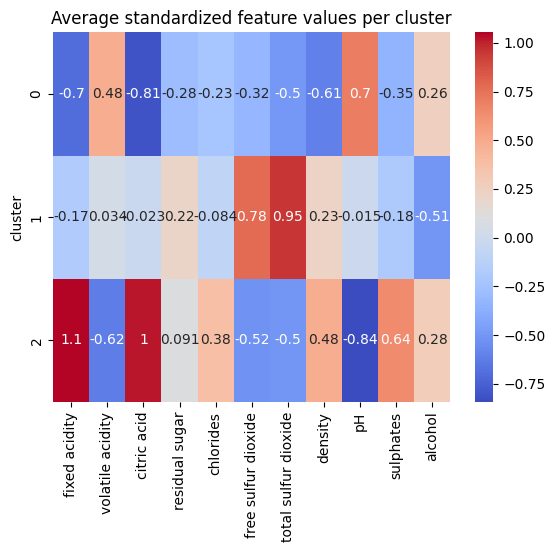

In [63]:
cluster_means = df_scaled.groupby("cluster").mean()
print(cluster_means)

sns.heatmap(cluster_means, cmap="coolwarm", annot=True)
plt.title("Average standardized feature values per cluster")
plt.show()

To see if clusters show differences in quality, we can compare these two features within a crosstable. One cluster for example has a lot more datasets for quality value 5 than the other two. This could lead to the assumption, that correlations between other features could predict the quality of a wine.

In [64]:
pd.crosstab(df_transformed["quality"], df_scaled["cluster"])

cluster,0,1,2
quality,,,
3,1,2,2
4,12,13,7
5,161,127,130
6,117,126,92
7,35,49,41
8,3,2,5


# 4 Data Model
_Define what you want to model and choose an appropriate model framework. Define a simple baseline model and a loss function - theoretically and practically. Explain the model in terms of input-output data structures and dimensions._

### Supervised Learning: Linear Model x -> y

From this point onward, we move into the modeling phase of our project.
After cleaning and exploring the dataset, we now want to build a model that predicts wine quality based on its chemical properties.
We’ll start with a simple baseline model and then gradually increase the model’s complexity.

First, we need to define our model and loss function. For our baseline model we chose a linear model, that takes one argument in and produces one output.

In [65]:
#linear model - linear regression
model = nn.Sequential(nn.Linear(1, 1)) # n_in = 1, n_out = 1

# baseline model: y​=w⋅x+b |w= weights = wie stark es die Qualität beeinflusst, b=bias = Verschiebung der Linie
# MSE == Mean Squared Error
loss_func_MSE = nn.MSELoss()

#SGD == Stochastic Gradient Descent
optimizer_SGD = torch.optim.SGD(model.parameters()) #optimiert w & b, damit loss minimiert wird

In [66]:
#defining the column/feature name for the input data
feat_name = "volatile acidity"
feat_index = features.index(feat_name)

# Extracting that feature from training and test data
x_basic_tr = torch.as_tensor(X_tensor_train[:, feat_index], dtype=torch.float32).view(-1, 1)
x_basic_te = torch.as_tensor(X_tensor_test[:,  feat_index], dtype=torch.float32).view(-1, 1)

# Target variable (wine quality)
y_basic_tr = torch.as_tensor(y_tensor_train, dtype=torch.float32).view(-1, 1)
y_basic_te = torch.as_tensor(y_tensor_test, dtype=torch.float32).view(-1, 1)

print(f"shape(x_basic_tr): {x_basic_tr.shape}")
print(f"shape(y_basic_tr): {y_basic_tr.shape}")

print(f"shape(x_basic_te): {x_basic_te.shape}")
print(f"shape(y_basic_te): {y_basic_te.shape}")

shape(x_basic_tr): torch.Size([1087, 1])
shape(y_basic_tr): torch.Size([1087, 1])
shape(x_basic_te): torch.Size([272, 1])
shape(y_basic_te): torch.Size([272, 1])


Here, we extract only the “volatile acidity” feature from our dataset.
The model will try to learn how this acidity value influences the overall wine quality.

# 5 Train Model
_Define Train and Test Data and run the training loop. Monitor the behaviour of the loss function._

We already splitted the data into test and train data in chapter 3 when we also transformed and normalised the data.   
In this step we collect the losses in an array to plot them later. We use the train data (x_basic_tr) for training the model. The epochs are set to 1000.

In [67]:
losses = []
model.train()
for epoch in range(1000):
    optimizer_SGD.zero_grad()
    y_pred_basic_tr = model(x_basic_tr)
    loss = loss_func_MSE(y_pred_basic_tr, y_basic_tr) #vergleicht Vorhersage mit echten Werten
    loss.backward()
    optimizer_SGD.step()
    losses.append(loss.item())  #wandelt loss in float um und speichert es

# 6 Evaluate Model
_Run model predictions on the test data set. Calculate and visualize the appropriate metrics to evaluate model performance. Explain why a separate test data set should be used for such evaluations._

We use the before splittet test data set to evaluate our model and NOT the train data. Since the model has never seen this data before, it is a better representation of the models accuracy. If a model predicts outcomes using the same data it has been used for training, the model is too closely aligned with the known data, which could bias the result. This is also called "overfitting".

In [68]:
model.eval()
with torch.no_grad():
    y_pred_basic_te = model(x_basic_te)                         #using test data to evaluate
    test_loss = loss_func_MSE(y_pred_basic_te, y_basic_te).item()

print("Final train loss:", losses[-1])
print("Test loss:", test_loss)
for name, p in model.named_parameters():
    print(name, p.detach())

Final train loss: 1.2058165073394775
Test loss: 1.122591257095337
0.weight tensor([[-0.1454]])
0.bias tensor([4.8604])


The result shows that the model has actually learned and is not overfitted. If the training loss and test loss are somewhat similar, we can conclude that it actually learned from the data instead of memorising it.

The following chart shows that the losses decrease with each iteration but eventually stops to do so.

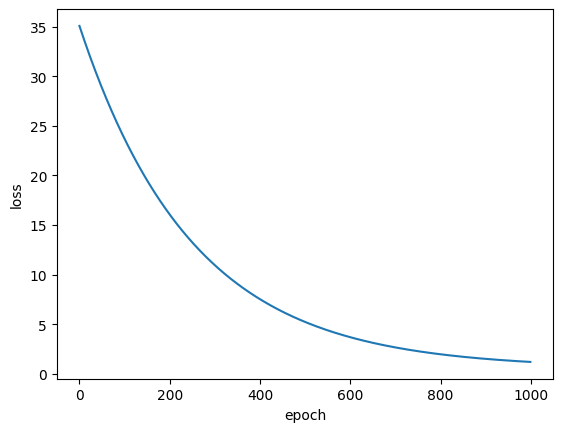

In [69]:
plt.figure()
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

However, what happens if we run the model on new unknown X-values?

The plot shows that as volatile acidity increases, the model predicts lower wine quality which the yellow line shows.  
The blue points are spread widely around the line, so using this single feature gives imprecise predictions.  
In short: volatile acidity is negatively related to quality, but alone it’s not enough to predict quality reliably.

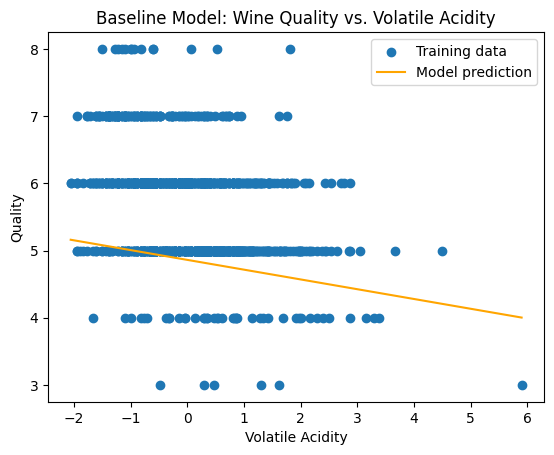

In [70]:
# Visualization: regression line vs. actual data points
x_basic_min = x_basic_tr.min().item()
x_basic_max = x_basic_tr.max().item()
x_basic_newArea = torch.linspace(x_basic_min, x_basic_max, 200).view(-1, 1)
y_pred_line = model(x_basic_newArea).detach().numpy().flatten()

plt.scatter(x_basic_tr, y_basic_tr, label="Training data")
plt.plot(x_basic_newArea, y_pred_line, color="orange", label="Model prediction")
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality")
plt.legend()
plt.title("Baseline Model: Wine Quality vs. Volatile Acidity")
plt.show()


# 7 Improve Model
_Suggest extensions to your baseline model and repeat steps 4. - 6. Do these extensions improve the model?_

As seen in the model above, the predictions were not accurate at all. To improve the model, we can increase the amount of input variables.

In [71]:
x_linear11_tr = torch.as_tensor(X_tensor_train[:,:], dtype=torch.float32)
x_linear11_te = torch.as_tensor(X_tensor_test[:,:], dtype=torch.float32)

print(f"shape(x_linear11_tr): {x_linear11_tr.shape}")
print(f"shape(y_basic_tr): {y_basic_tr.shape}")

print(f"shape(x_linear11_te): {x_linear11_te.shape}")
print(f"shape(y_basic_te): {y_basic_te.shape}")

shape(x_linear11_tr): torch.Size([1087, 11])
shape(y_basic_tr): torch.Size([1087, 1])
shape(x_linear11_te): torch.Size([272, 11])
shape(y_basic_te): torch.Size([272, 1])


We als increase the epochs count to 10000.

In [72]:
n_epochs = 10000
all_coll = X_tensor_train.shape[1]

# multiple lineares Modell 
model_multiple = nn.Linear(all_coll, 1)  # only change: n_in = 11, n_out = 1 
#new baseline model: y​=w1⋅x1 + w2⋅x2 + ... + wn⋅xn + b 

# all below as before
loss_func_MSE = nn.MSELoss()  # MSE!
optimizer_SGD = torch.optim.SGD(model_multiple.parameters()) 

losses = []
model_multiple.train()
for epoch in range(n_epochs):
    optimizer_SGD.zero_grad()
    y_pred_tr = model_multiple(x_linear11_tr)
    loss = loss_func_MSE(y_pred_tr, y_basic_tr)
    loss.backward()
    optimizer_SGD.step()
    losses.append(loss.item())

print("Fitted parameters:")
print("Intercept (bias):", model_multiple.bias.item())

## Notice more weights
print("Coefficients (weights):", model_multiple.weight.detach().numpy())
print('Loss: ', loss)   

Fitted parameters:
Intercept (bias): 5.636495590209961
Coefficients (weights): [[ 0.03893896 -0.1765901  -0.03818475  0.01363749 -0.10634456  0.06900172
  -0.11918567 -0.029142   -0.07631451  0.17260933  0.2891983 ]]
Loss:  tensor(0.4329, grad_fn=<MseLossBackward0>)


This model is a multiple linear regression.
It estimates the wine quality as a weighted sum of all 11 input features.
Each weight represents how strongly that specific chemical attribute affects the predicted quality.
The bias represents the predicted quality when all feature values are zero. In other words, it’s the model’s baseline prediction, meaning that with average values, the model predicts an “average-quality” wine, around 5.636.

Now that this model has been trained, we need to evalute this model.

In [73]:
model_multiple.eval()
with torch.no_grad():
    y_pred_linear11_te = model_multiple(x_linear11_te)
    test_loss = loss_func_MSE(y_pred_linear11_te, y_basic_te).item()

    # numers rounded to full numbers to plot
    y_pred_linear11_round = torch.round(y_pred_linear11_te).clamp(3, 8).int()

print("Final train loss:", losses[-1])
print("Test loss:", test_loss)

Final train loss: 0.4328625500202179
Test loss: 0.41590332984924316


The result shows that it has been trained good but is also a better model than the previous one with only one input.


# HIERZU NOCH WAS SCHREIBEN

C:\Users\minhd\AppData\Local\Temp\ipykernel_14852\563805250.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


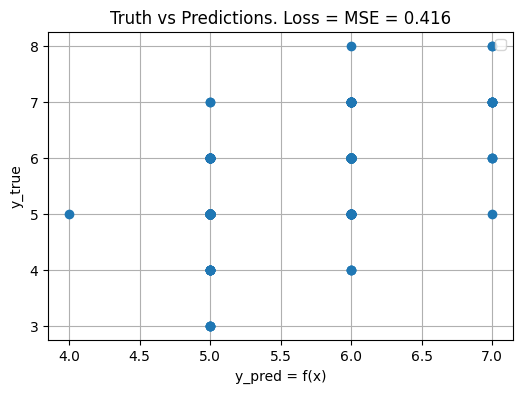

In [74]:
title_str = f"Truth vs Predictions. Loss = MSE = {test_loss:.3f}"
plt.figure(figsize=(6,4))
plt.plot(y_pred_linear11_round, y_basic_te, 'o')
plt.xlabel("y_pred = f(x)")
plt.ylabel("y_true")
plt.title(title_str)
plt.legend()
plt.grid(True)
plt.show()

Since wine quality is rated on an integer scale from 3 to 8, we can also round our regression outputs and view them as classification results.
The confusion matrix shows how often each class was correctly or incorrectly predicted.

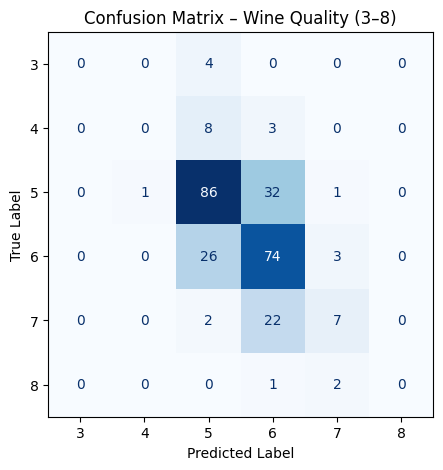

In [75]:
cm = confusion_matrix(y_basic_te, y_pred_linear11_round, labels=np.arange(3, 9))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.arange(3, 9))

fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
plt.title("Confusion Matrix – Wine Quality (3–8)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

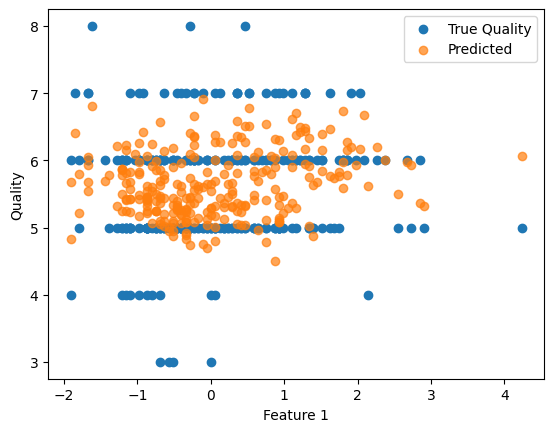

In [76]:
plt.scatter(X_tensor_test[:, 0], y_basic_te, label="True Quality")
plt.scatter(X_tensor_test[:, 0], y_pred_linear11_te, label="Predicted", alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Quality")
plt.legend()
plt.show()


im Plot kann man nur 2 Dinge zeigen. Also 1 Feature und Quality

- alles in einem plot schwer, da 11 features
- orangene Punkte alle zwischen 3 und 6 -> Wertebereich der echten Qualitätswerte -> keine unrealistische Vorhersage
- sehr dicht um Wert 5 versammelt, nie den Wert 3 oder 8
- Je höher Epoch, desto höher stieg die Qualität -> genug trainiert, aber dennoch keine 8
- vlt weil nicht stark genug correliert mit Quality?
- gibt kaum Wein im Datensatz, was den Wert 3 / 8 hat

- keine klare Linie/Kurve -> kann mit nur 1 Feature nicht gut erklären, ob der Wein gut oder schlecht ist

Warum klappt ein lineares Modell nicht?
A: Kann nur gerade Linien bilden. Beziehungen der Merkmale zur Quality sind nicht linear -> kann es nicht abbilden


### Multinomial Regression

The above model is still very inaccurate. What we will be trying now is a weighted output over multiple variables. These variables will be integers from 3 to 8 representing the wine quality values. 
The model will calculate weights, or probabilities for each output. The one with the highst probability becomes the y-value.

In [77]:
losses = []

# values from 3 - 8 to 0 - 5 for classification
y_tr_ce = (y_basic_tr.squeeze(1).to(torch.long) - 3) #quality values minus 3 because CrossEntropyLoss need values from 0 to n
y_te_ce = (y_basic_te.squeeze(1).to(torch.long) - 3)  #same for test datasets

n_epochs = 10000
model_multinom = nn.Linear(all_coll, 6)  #  6 output, 1 per class
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_multinom.parameters(), lr=0.001)

model_multinom.train()
for epoch in range(n_epochs):
    z = model_multinom(x_linear11_tr)
    loss = loss_func(z, y_tr_ce)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

model_multinom.eval()
with torch.no_grad():
    z_te = model_multinom(x_linear11_te)
    probs = torch.softmax(z_te, dim=1)  # Wahrscheinlichkeiten (0–1)
    y_pred = torch.argmax(probs, dim=1) + 3  #plus 3 um zu Ursprungwerten zurück zugehen 3..8

print(y_pred[:10])

tensor([5, 6, 7, 5, 5, 7, 6, 5, 6, 6])


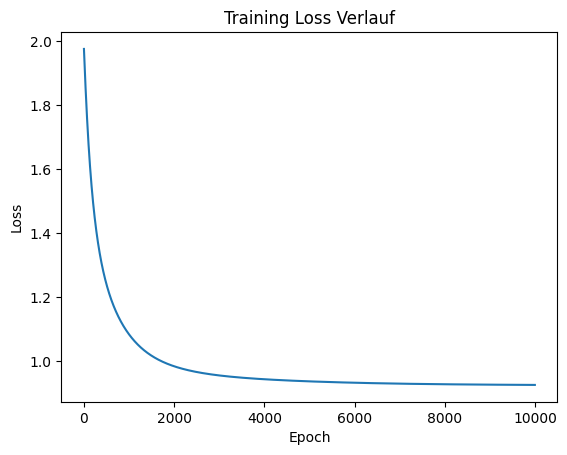

In [78]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Verlauf")
plt.show()

To test a classification approach, we trained a linear model with six output neurons - one for each possible quality level.
The Cross Entropy Loss function measures how well the predicted probability distribution matches the true class.

In the Pairity Plot we see that the predicted values are now limited to the actual quality values. In Addition, we have three values that were correctly predicted.

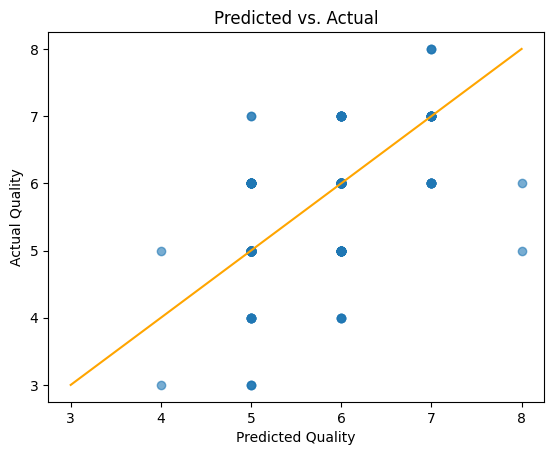

In [79]:
y_pred_np = y_pred.detach().numpy().flatten()
y_true_np = y_basic_te.detach().numpy().flatten()

plt.scatter(y_pred_np, y_true_np, alpha=0.6)
plt.ylabel("Actual Quality")
plt.xlabel("Predicted Quality")
plt.title("Predicted vs. Actual")
plt.plot([3, 8], [3, 8], color="orange") 
plt.show()

To better see how many predictions were made for each value, we plot a confusion matrix.  
This account supports the previous one. The direction is a little bit because the matrix origin is at the upper left corner.  
It shows that we have three values on the diagonal line, indicating some correct predictions.  
We were also able to reduce our false predictions.



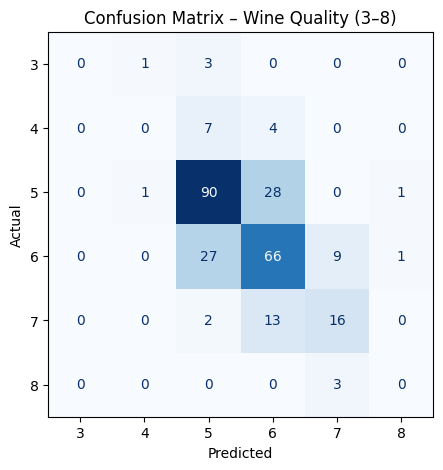

In [80]:
cm = confusion_matrix(y_basic_te, y_pred, labels=np.arange(3, 9))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.arange(3, 9))

fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
plt.title("Confusion Matrix – Wine Quality (3–8)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Linear models can only capture straight-line relationships.
To model more complex, nonlinear interactions between wine features, we now try to create and train a neural network.

Neural network is a bunch of layers which learns about the data and passes the result to the next layer.
As an example, layer 1 learns that low sugar wine tends to be better. Layer 2 learns that it applies only when the alcohol is high. Layer 3 learns that this also applies only if the acidity is low. It combines of all this to predict, in this case, the quality.
We also use the Adam optimizer for efficient learning, and a Smooth L1 loss, which combines the benefits of MSE and MAE and is robust to outliers.

In [81]:
loss_func = nn.SmoothL1Loss() #combination of MSE and MAE, robust to outliers
# Neural network with 3 layers
model_seq = nn.Sequential(
    nn.Linear(all_coll, 32), #n_in = 11, n_out = 16
    nn.ReLU(), # like gate, only pass positive values forward
    nn.Linear(32, 16),
    nn.ReLU(),                  #Rectified Linear Unit == ReLU(x) = max(0,x) | 
    nn.Linear(16, 8),   
    nn.ReLU(),
    nn.Linear(8, 1)            
)

optimizer = torch.optim.Adam(model_seq.parameters(), lr=0.01) #faster & more stable than SGD

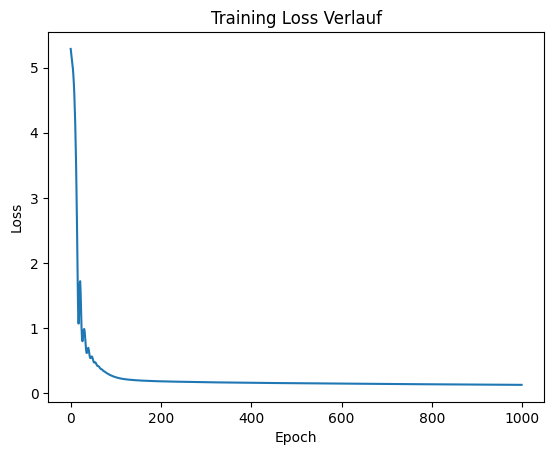

In [82]:
n_epochs = 1000

losses = []
model_seq.train()

for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred = model_seq(x_linear11_tr)
    loss = loss_func(y_pred, y_basic_tr)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Verlauf")
plt.show()


This plot shows the training loss decreasing steadily over time,
which indicates that the neural network is successfully learning to minimize its prediction errors but like previous one, it stops decreasing.

Now to evalute it.
Compared to the other models, this has proven to be the best among them with a loss rate of 0.24.

In [83]:
model_seq.eval()
with torch.no_grad():
    y_pred_te = model_seq(x_linear11_te)
    test_loss = loss_func(y_pred_te, y_basic_te).item()

print("Test Loss:", test_loss)


Test Loss: 0.22757087647914886


In the following graph we can see how well it has been predicted.  
The plot shows true quality on the x‑axis and predicted quality on the y‑axis. The points on the orange line are perfect predictions.   
Most points are near the line, so the model is usually close, but many points are a bit above or below it.   
We can conclude that the model works reasonably well but still makes noticeable mistakes.

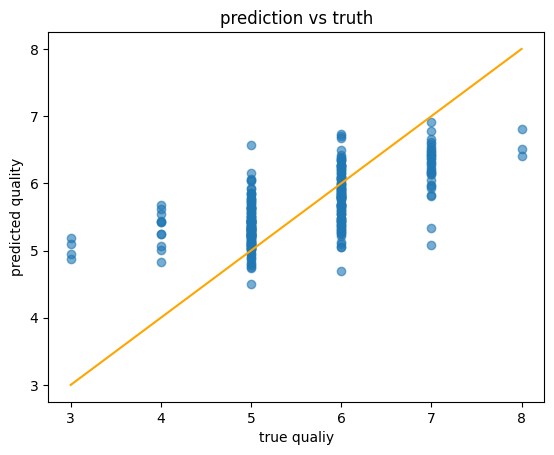

In [84]:
y_pred_np_notLinear = y_pred_linear11_te.detach().numpy().flatten()
y_true_np_notLinear = y_basic_te.detach().numpy().flatten()

plt.scatter(y_true_np_notLinear, y_pred_np_notLinear, alpha=0.6)
plt.xlabel("true qualiy")
plt.ylabel("predicted quality")
plt.title("prediction vs truth")
plt.plot([3, 8], [3, 8], color="orange") 
plt.show()


For a more accurate view we did a confusion matrix.
The model mostly predicts 5 or 6.
- It often gets 5s and 6s right but mixes them up a lot.
- Scores 3, 4, 7, 8 are rare and usually predicted wrong.
The reason could be, that there are not enough samples for the outliers.


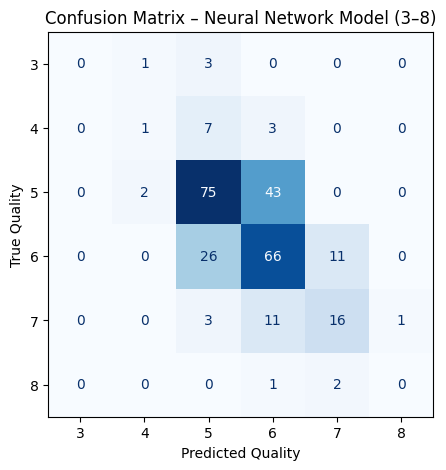

In [85]:

# Convert continuous NN predictions to integer quality levels (3–8)
y_pred_nn_round = torch.round(y_pred_te).clamp(3, 8).int()

# Create the confusion matrix
cm_nn = confusion_matrix(y_basic_te, y_pred_nn_round, labels=np.arange(3, 9))
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn,
                                 display_labels=np.arange(3, 9))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
disp_nn.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
plt.title("Confusion Matrix – Neural Network Model (3–8)")
plt.xlabel("Predicted Quality")
plt.ylabel("True Quality")
plt.show()

### Conclusion
We were not able to build a model that reliably predicts wine quality.  
However, we were able to improve the model step by step adjusting small details like using more than one feature as input data and increasing the epochs.  
What seemingly helped the most, was implementing a multinomial regression in order to make a weighted prediction on multiple outputs.